Load the `ISLR2` and `tidymodels` packages.

In [3]:
library('ISLR2')
library('tidymodels')



Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



Take a look at the `Smarket` dataset which comes from the ISLR2 package (also described in [the book](https://www.statlearning.com/)). 

In [4]:
Smarket |> head() #stock market data set, look at contextual help for info



,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up
6,2001,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up


Let's see if we can predict when the market will be "Up" or "Down" (see the "Direction" variable of `Smarket`). We use the following variables as predictors:

- Lag1: *percentage returns from previous before*
- Volume: *the number of shares traded on the previous day, in billions*

First we need to split our data into training and test subsets. 

Plot the number of observations per year using a bar chart.

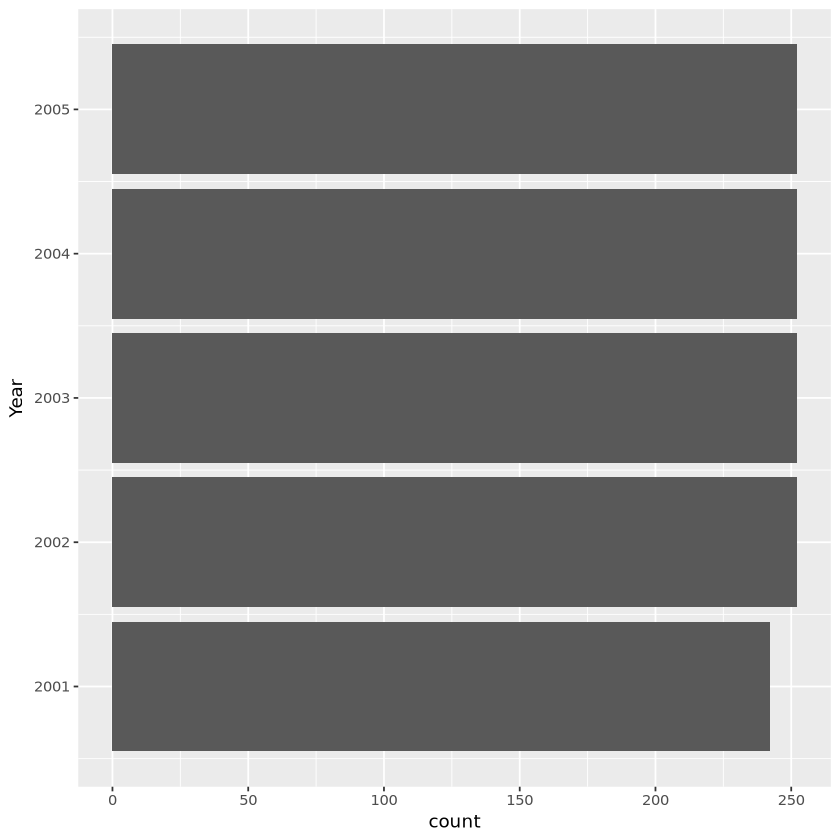

In [5]:
ggplot(Smarket, aes(y=Year)) + geom_bar()



Run the following cell after substituting `PUT_MOST_RECENT_YEAR_HERE` with a value deduced from the chart above. Why is this a sensible way to split our data?

In [6]:
Smarket_train = Smarket |> filter(Year < 2005) #test model from not model derivde data

Smarket_test = Smarket |> filter(Year == 2005)

Generate a model to predict market direction.
- Use the `logistic_reg()` function from `tidymodels` and the "glm" engine.
- Use the training data from above and call your fitted model `mod_fit`.
- Use `Direction ~ Volume + Lag1` as the formula.

In [7]:
mod = logistic_reg() |> set_engine('glm') #set up a model and set engine
#then you could build a recipe, but ultimately fit a model
mod_fit = mod |> fit(Direction ~ Volume + Lag1, data = Smarket_train) #vol and lag1 as predictors
mod_fit |> tidy() #makes it clean looking



term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.17895928,0.33084304,0.5409190,0.5885634
Volume,-0.10736808,0.23747318,-0.4521272,0.6511774
Lag1,-0.05332657,0.05173953,-1.0306737,0.3026938


Run the following code to predict from your test data and generate a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). When the market is "Up" how often does your model predict the same?

In [8]:
augment(mod_fit, Smarket_test) |> head()
    #conf_mat(Direction, .pred_class)

.pred_class,.pred_Down,.pred_Up,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Up,0.4746176,0.5253824,2005,-0.134,0.008,-0.007,0.715,-0.431,0.7869,-0.812,Down
Up,0.4849923,0.5150077,2005,-0.812,-0.134,0.008,-0.007,0.715,1.5108,-1.167,Down
Up,0.4859010,0.5140990,2005,-1.167,-0.812,-0.134,0.008,-0.007,1.7210,-0.363,Down
Up,0.4970964,0.5029036,2005,-0.363,-1.167,-0.812,-0.134,0.008,1.7389,0.351,Up
Down,0.5020574,0.4979426,2005,0.351,-0.363,-1.167,-0.812,-0.134,1.5691,-0.143,Down
Up,0.4930240,0.5069760,2005,-0.143,0.351,-0.363,-1.167,-0.812,1.4779,0.342,Up


Run the following code to calculate the error rate for the model.

In [9]:
augment(mod_fit, Smarket_test) |>
    mutate(model_incorrect = Direction != .pred_class) #|>
    #summarize(error_rate_aka_n_incorrect = sum(model_incorrect) / n())

.pred_class,.pred_Down,.pred_Up,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,model_incorrect
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>
Up,0.4746176,0.5253824,2005,-0.134,0.008,-0.007,0.715,-0.431,0.78690,-0.812,Down,TRUE
Up,0.4849923,0.5150077,2005,-0.812,-0.134,0.008,-0.007,0.715,1.51080,-1.167,Down,TRUE
Up,0.4859010,0.5140990,2005,-1.167,-0.812,-0.134,0.008,-0.007,1.72100,-0.363,Down,TRUE
Up,0.4970964,0.5029036,2005,-0.363,-1.167,-0.812,-0.134,0.008,1.73890,0.351,Up,FALSE
Down,0.5020574,0.4979426,2005,0.351,-0.363,-1.167,-0.812,-0.134,1.56910,-0.143,Down,FALSE
Up,0.4930240,0.5069760,2005,-0.143,0.351,-0.363,-1.167,-0.812,1.47790,0.342,Up,FALSE
Up,0.4998249,0.5001751,2005,0.342,-0.143,0.351,-0.363,-1.167,1.49040,-0.610,Down,TRUE
Up,0.4870931,0.5129069,2005,-0.610,0.342,-0.143,0.351,-0.363,1.48880,0.398,Up,FALSE
Down,0.5024961,0.4975039,2005,0.398,-0.610,0.342,-0.143,0.351,1.56210,-0.863,Down,FALSE


Run the following code to calculate the error rate for a simple model that always predicts "Up". Is the error rate better than your logistic regression model?

In [18]:
Smarket_test |>
    summarise(error_rate = mean(Direction != "Up")) #error rate is lower in test data just given training data. 
#our model does not work as well as a model that always predicts up

error_rate
<dbl>
0.4404762
